<a href="https://colab.research.google.com/github/LeTranDinhTruc/w9_AI_BT/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


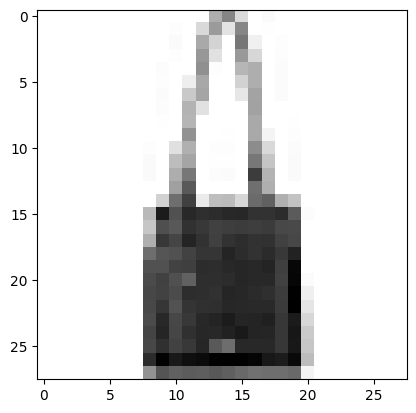

hinh: 8


In [ ]:
import matplotlib.pyplot as plt
fashion=x_train[200]
plt.imshow(fashion,cmap=plt.cm.binary)
plt.show()
print('hinh:',y_train[200])

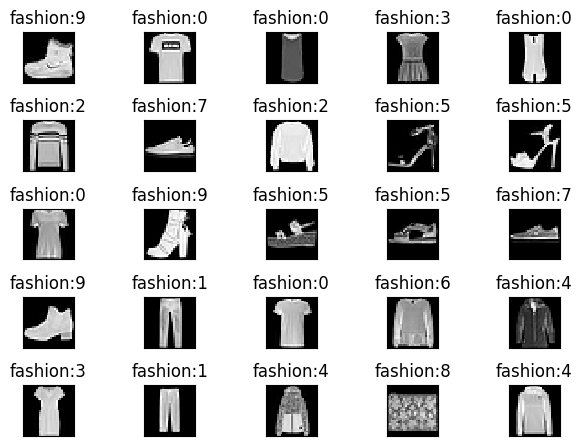

In [ ]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('fashion:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
#Dense: full connetion
#tao model mang ANN
model=Sequential()
#them lop mang trung gian
model.add(Dense(750,activation='relu',input_shape=(28*28,)))
#them lop mang trung gian
model.add(Dense(500,activation='relu'))
#them lop mang trung gian
model.add(Dense(250,activation='relu'))
#them lop dau ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 750)               588750    
                                                                 
 dense_9 (Dense)             (None, 500)               375500    
                                                                 
 dense_10 (Dense)            (None, 250)               125250    
                                                                 
 dense_11 (Dense)            (None, 10)                2510      
                                                                 
Total params: 1,092,010
Trainable params: 1,092,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X=x_test
Y=y_test

In [ ]:
x_train=x_train.reshape(60000,28*28)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,28*28)
x_test=x_test.astype('float32')/255

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('mat mat:',test_loss)
print('do chinh xac:',test_acc)

Epoch 1/10
469/469 [==============================] - 14s 27ms/step - loss: 0.2330 - accuracy: 0.9132
Epoch 2/10
469/469 [==============================] - 17s 37ms/step - loss: 0.2248 - accuracy: 0.9133
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2203 - accuracy: 0.9172
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2167 - accuracy: 0.9178
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2107 - accuracy: 0.9211
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2056 - accuracy: 0.9221
Epoch 7/10
469/469 [==============================] - 11s 24ms/step - loss: 0.2041 - accuracy: 0.9232
Epoch 8/10
469/469 [==============================] - 11s 23ms/step - loss: 0.1987 - accuracy: 0.9246
Epoch 9/10
469/469 [==============================] - 12s 24ms/step - loss: 0.1959 - accuracy: 0.9261
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.5432 

In [ ]:
model.save('fashion.h5')